# Análise Exploratória de Dados com Python

## conjunto de dados do SKLEARN sobre Vinhos

In [12]:
# imports 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_wine
%matplotlib inline

In [13]:
# carregando o dataset 
wine = load_wine()
data = pd.DataFrame(wine.data, columns=wine.feature_names)

In [14]:
# primeiras colunas
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [7]:
# visualizando tipos
data.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

In [15]:
# verificando a ocorrência de nulos
data.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

# Extração e Transformação de Dados

In [17]:
# imprimindo a variável que queremos prever - possíveis classificações do vinho
# class_0 - class_01 - class02
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [20]:
# classificação númerica do target - vinhos 0, 1 e 2
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [25]:
# adicionando uma nova coluna ao dataset com a variável target (em string)
data['Classification'] = pd.Categorical.from_codes(wine.target, wine.target_names)

In [27]:
# adicionando uma nova coluna ao dataset com a variável target (numérica)
data['Num_Class'] = wine.target

In [28]:
data.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Classification,Num_Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,class_0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,class_0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,class_0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,class_0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,class_0,0


In [34]:
# extraindo e imprimindo as features (todas as colunas até a coluna 13)
Features = data.columns[:13]
Features

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [36]:
# Calcule a média de cada feature para as 3 classes
data.groupby('Num_Class').mean().T

Num_Class,0,1,2
alcohol,13.744746,12.278732,13.153750
malic_acid,2.010678,1.932676,3.333750
ash,2.455593,2.244789,2.437083
alcalinity_of_ash,17.037288,20.238028,21.416667
magnesium,106.338983,94.549296,99.312500
total_phenols,2.840169,2.258873,1.678750
flavanoids,2.982373,2.080845,0.781458
nonflavanoid_phenols,0.290000,0.363662,0.447500
proanthocyanins,1.899322,1.630282,1.153542
color_intensity,5.528305,3.086620,7.396250


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
Classification                  178 non-null category
Num_Class                       178 non-null int32
dtypes: category(1), float64(13), int32(1)
memory usage: 19.1 KB


## Exploração de Dados

In [38]:
# imprimindo a matriz transposta do conjunto de dados
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
alcohol,14.23,13.2,13.16,14.37,13.24,14.2,14.39,14.06,14.83,13.86
malic_acid,1.71,1.78,2.36,1.95,2.59,1.76,1.87,2.15,1.64,1.35
ash,2.43,2.14,2.67,2.5,2.87,2.45,2.45,2.61,2.17,2.27
alcalinity_of_ash,15.6,11.2,18.6,16.8,21,15.2,14.6,17.6,14,16
magnesium,127,100,101,113,118,112,96,121,97,98
total_phenols,2.8,2.65,2.8,3.85,2.8,3.27,2.5,2.6,2.8,2.98
flavanoids,3.06,2.76,3.24,3.49,2.69,3.39,2.52,2.51,2.98,3.15
nonflavanoid_phenols,0.28,0.26,0.3,0.24,0.39,0.34,0.3,0.31,0.29,0.22
proanthocyanins,2.29,1.28,2.81,2.18,1.82,1.97,1.98,1.25,1.98,1.85
color_intensity,5.64,4.38,5.68,7.8,4.32,6.75,5.25,5.05,5.2,7.22


In [40]:
# resumo estatístico
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Num_Class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [44]:
data['alcohol'].value_counts(dropna=False)

12.37    6
13.05    6
12.08    5
12.29    4
12.00    3
12.25    3
12.42    3
12.93    2
12.60    2
12.85    2
14.10    2
13.16    2
14.06    2
13.88    2
13.56    2
14.38    2
13.86    2
13.17    2
12.77    2
13.58    2
13.49    2
12.72    2
12.51    2
12.70    2
13.71    2
13.11    2
13.48    2
14.22    2
13.73    2
13.24    2
        ..
12.69    1
13.39    1
13.87    1
12.52    1
12.16    1
13.52    1
11.56    1
13.45    1
11.62    1
12.20    1
14.13    1
12.88    1
13.51    1
12.58    1
12.36    1
14.37    1
12.82    1
12.67    1
13.68    1
13.30    1
12.07    1
13.94    1
14.39    1
13.82    1
11.64    1
13.34    1
13.69    1
13.90    1
13.84    1
13.75    1
Name: alcohol, Length: 126, dtype: int64

# Plotando Dados

In [70]:
alcohol = data['alcohol']
malic_acid = data['malic_acid']
ash = data['ash']
alcalinity_of_ash = data['alcalinity_of_ash']
magnesium = data['magnesium']
total_phenols = data['total_phenols']
flavanoids = data['flavanoids']
nonflavanoid_phenols = data['nonflavanoid_phenols']
proanthocyanins = data['proanthocyanins']
color_intensity = data['color_intensity']
hue = data['hue']
diluted = data['od280/od315_of_diluted_wines']
target = data['Num_Class']

Text(0.5, 1.0, 'Histograma do Percentual de Álcool dos Vinhos')

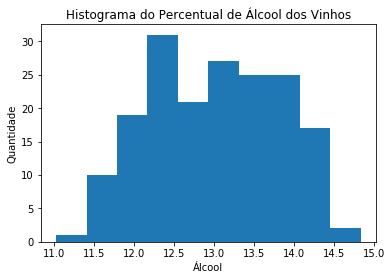

In [65]:
# Histograma do Alcohol
plt.hist(alcohol)
plt.xlabel('Álcool')
plt.ylabel('Quantidade')
plt.title('Histograma do Percentual de Álcool dos Vinhos')

Text(0, 0.5, 'Quantidade')

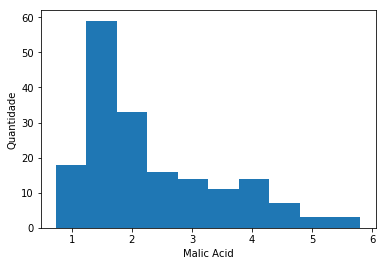

In [67]:
# Histograma do Malic Acid
plt.hist(malic_acid)
plt.xlabel('Malic Acid')
plt.ylabel('Quantidade')


Text(0, 0.5, 'Alcalinity of Ash')

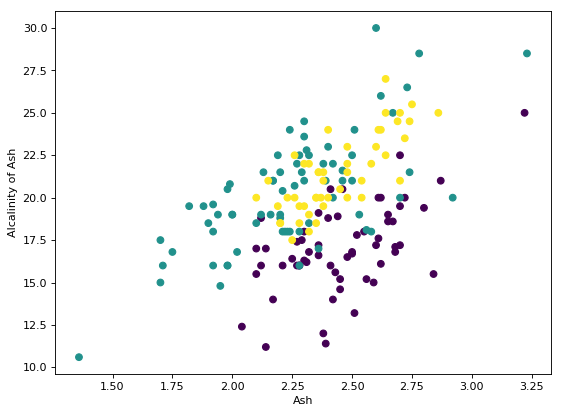

In [95]:
# Scatter plot da feature Alcalinity_Of_Ash x Ash dividido pelas cores de cada categoria
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(ash, alcalinity_of_ash, c=target)
plt.xlabel('Ash')
plt.ylabel('Alcalinity of Ash')

Text(0, 0.5, 'Matiz')

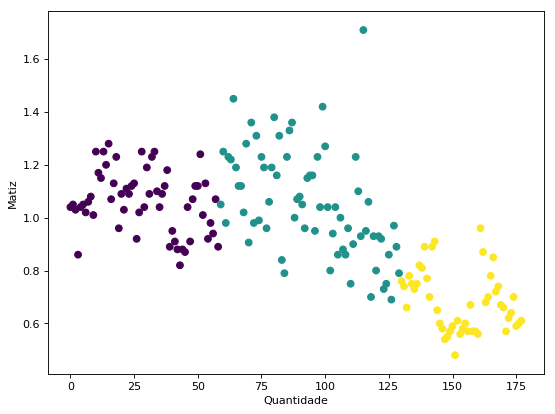

In [94]:
# Scatter plot da feature Alcalinity_Of_Ash x Ash dividido pelas cores de cada categoria
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(range(len(hue)), hue, c=target)
plt.xlabel('Quantidade')
plt.ylabel('Matiz')

Text(0, 0.5, 'Magnesium')

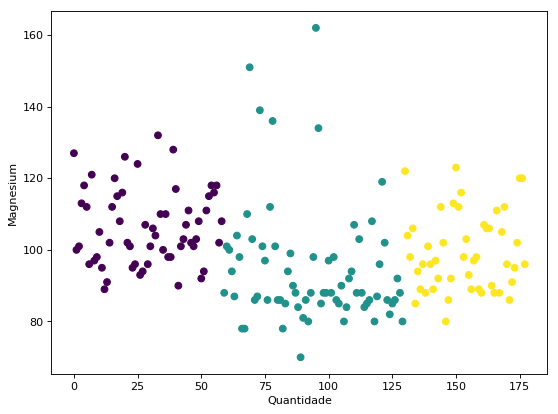

In [93]:
# Scatter plot da feature Alcalinity_Of_Ash x Ash dividido pelas cores de cada categoria
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(range(len(magnesium)), magnesium, c=target)
plt.xlabel('Quantidade')
plt.ylabel('Magnesium')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D523EB940>,
      dtype=object)

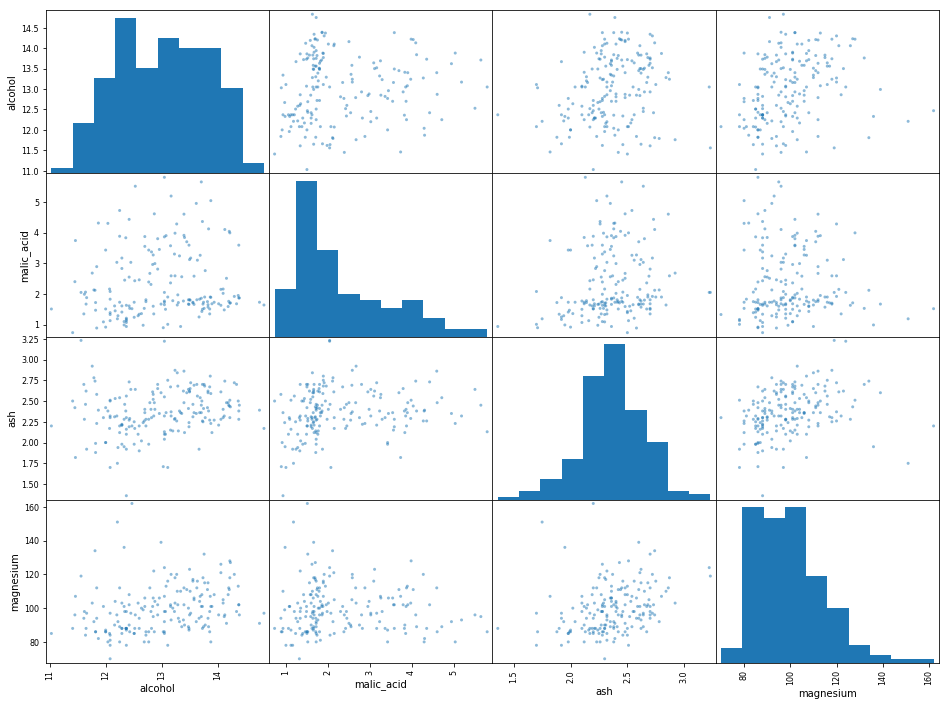

In [99]:
# Crie um Scatter Matrix das Features (atributos)
attributes1 = ['alcohol', 'malic_acid', 'ash', 'magnesium']
pd.plotting.scatter_matrix(data[attributes1], figsize=(16, 12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D554FCAC8>,
      dtype=object)

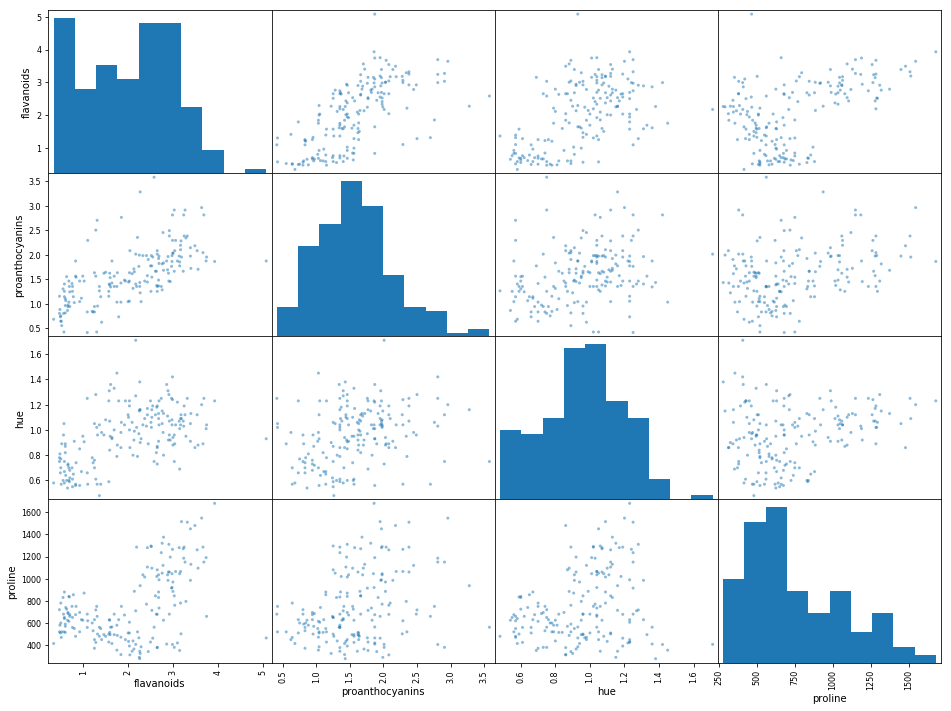

In [103]:
attributes2 = ['flavanoids', 'proanthocyanins', 'hue', 'proline']
pd.plotting.scatter_matrix(data[attributes2], figsize=(16, 12))